# Programming for Data Analytics Project 1
_Breeda Herlihy G0041136_

This notebook details Project 1 of Programming for Data Analytics at ATU, part of a post-graduate online course in Data Analytics. A data set containing the results of physicochemical laboratory tests and sensory tests on Portugeuse wine is examined and a new data set is simulated using various Python packages.

## Introduction

The __[wine quality dataset](http://www3.dsi.uminho.pt/pcortez/wine/)__ is based on _Vinho verde_ wine which comes from Minho region in northwest Portugal. Researchers from the University of Minho and the Viticulture Commission of the Vinho Verde (CVRVV) made the underlying dataset from their 2009 paper on "Modeling wine preferences by data mining from physicochemical properties" available publicly.**[1]**

Wine is made up of 98% water and alcohol and the remaining 2% comprises acids, sugars, volatile flavour and aroma compounds, pigment compounds and tannin.**[2]** These minor components exert huge influence on the flavour, quality, aroma and uniqueness of the wine. Each grape variety will have different minor components and these together with winemaking practices determine the composition and quality of wine produced.**[3]** 

Wine certification is undertaken to evaluate the quality of wine and is used for improving wine production and setting prices.**[1]** The wine quality dataset contains results from laboratory tests and sensory evaluation of red and white wines from _Vinho verde_. For this project the red wine dataset will be examined. 

![Picture of wine composition](https://www.mdpi.com/fermentation/fermentation-05-00027/article_deploy/html/images/fermentation-05-00027-ag-550.jpg) 

**[4]**© 2019, A. Vilela. [CC BY](http://creativecommons.org/licenses/by/4.0/). 

## Exploration of dataset
***

### Import data and additional python libraries

In [1]:
# Import relevant modules and libraries
from fileinput import filename
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

# Read in dataset and create a dataframe
# Dataset downloaded from http://www3.dsi.uminho.pt/pcortez/wine/
filename = 'winequality-red-csv.csv'
df = pd.read_csv(filename)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# review imported dataset
# check first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# check last 5 rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Review data
Use df methods to check data for any null values.

In [4]:
# review the data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# check for null values in columns
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Analyse dataset
Use python methods to view statistics for the variables and to visualise the data. The histogram plot of all variables' distribution shows that not all variables demonstrate a normal distribution. 

In Portugal, wine certification is assessed by physicochemical tests conducted in the laboratory and sensory tests conducted by wine experts.**[1]** The sensory test results are indicated in the 'quality' column in the dataframe. The heat map shows some positive correlation between quality and citric acid, sulphates and alcohol which are laboratory measurements. There is a negative correlation between volatile acidity and quality. Volatile acids are gaseous and are most often associated with spoilage occuring during fermentation or aging. One of the most common volatile acids is acetic acid which results in a vinegar taint in wine.**[5]** 

Even though correlation doesn't imply an effect on quality from the physicochemical properties, there is an obvious relationship between quality, citric acid, sulphates and quality. So the data from these variables will be synthesised.

In [6]:
# generate summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


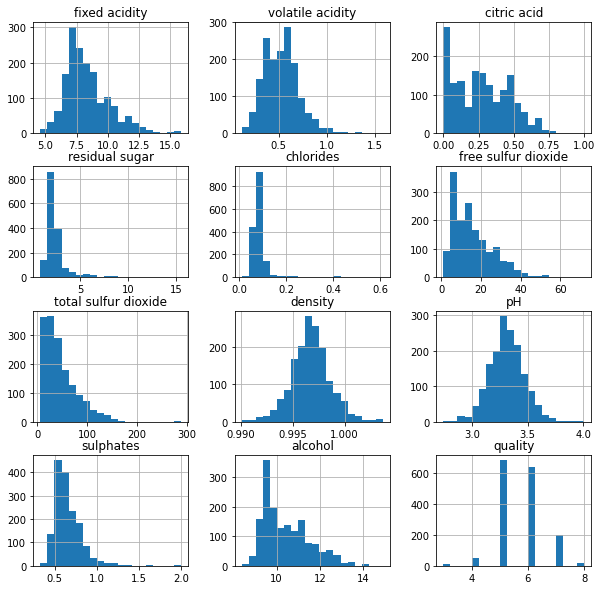

In [7]:
# review distribution of variables
df.hist(bins=20, figsize=(10, 10)) # https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/
plt.show()

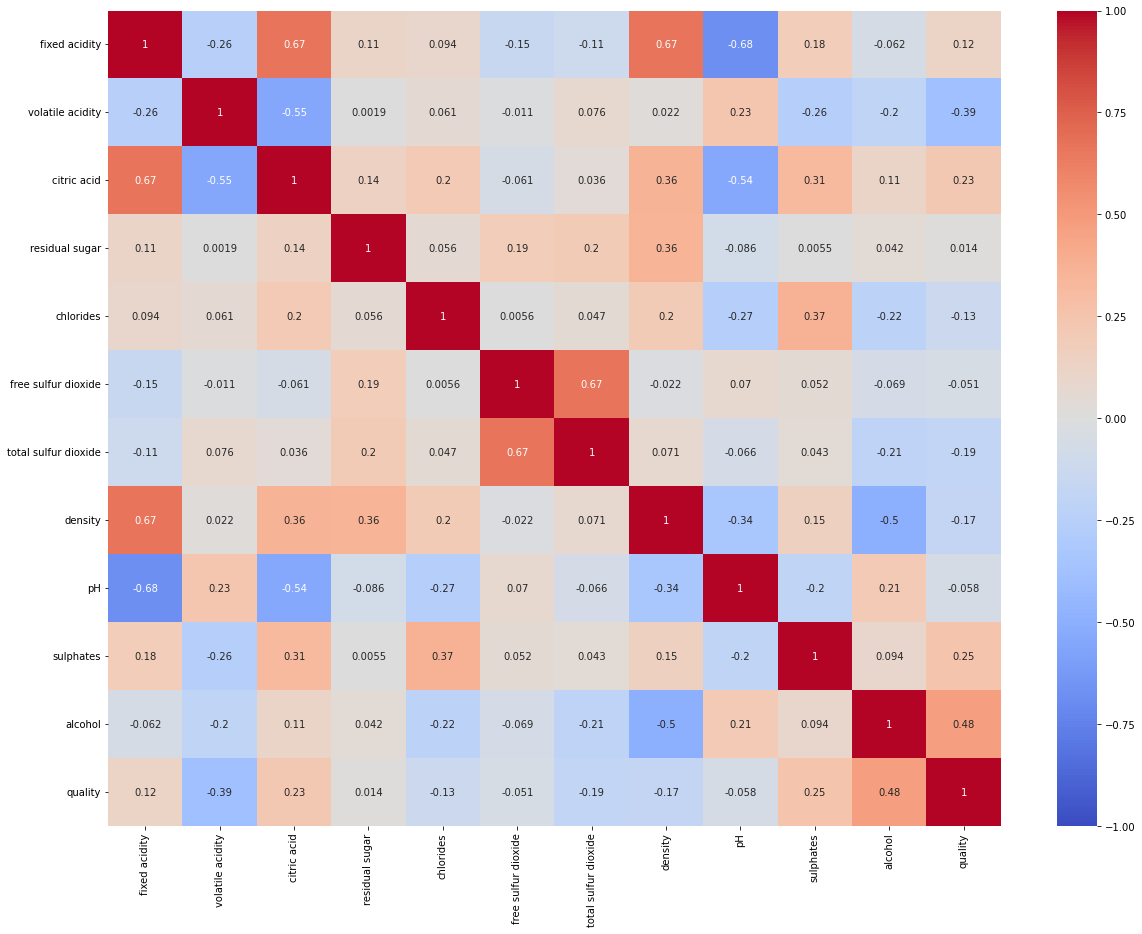

In [8]:
# Heat map uses the df.corr method and seaborn plotting to visualise correlation of any variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()
# https://medium.com/@virezee/regression-analysis-for-predicting-red-wine-quality-using-python-programming-language-26d1616955ed

### Dataset synthesis

In [9]:
# Separate physicochemical variables
z = df[['citric acid', 'sulphates','alcohol']]
z

,citric acid,sulphates,alcohol
0,0.00,0.56,9.4
1,0.00,0.68,9.8
2,0.04,0.65,9.8
3,0.56,0.58,9.8
4,0.00,0.56,9.4
...,...,...,...
1594,0.08,0.58,10.5
1595,0.10,0.76,11.2
1596,0.13,0.75,11.0
1597,0.12,0.71,10.2


### Check distribution of variables

In [10]:
# split df into individual variables to examine distribution
citric_acid = df.loc[:, 'citric acid']
citric_acid

0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1599, dtype: float64

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.63it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pareto,75.990409,88.853174,-4849.264591,inf,0.109771,3.096873e-17
expon,81.129463,111.891611,-4752.004689,inf,0.144664,1.148874e-29
gamma,86.923542,150.009673,-4634.324187,inf,0.232111,3.122416e-76
norm,96.633507,218.596682,-4472.372591,inf,0.083941,2.996599e-10
laplace,111.771034,155.977628,-4239.675092,inf,0.102618,4.104407e-15


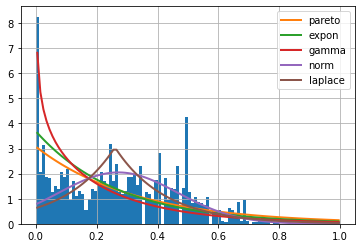

In [11]:
# Check likely distribution for citric acid 
from scipy import stats 

from fitter import Fitter, get_common_distributions, get_distributions 

# https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9 

f = Fitter(citric_acid, distributions=['norm','laplace','pareto','gamma','expon']) 

f.fit() 
f.summary() 

In [12]:
# normality test for citric acid
from numpy.random import randn
from scipy.stats import shapiro

stat, p = shapiro(citric_acid)
alpha = 0.05
if p > alpha:
 print('Distribution of citric acid data looks normal')
else:
 print('Distribution of citric acid data does not look normal')
#https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

Distribution of citric acid data does not look normal


In [13]:
# split df into individual variables to examine distribution
sulphates = df.loc[:, 'sulphates']
sulphates

0       0.56
1       0.68
2       0.65
3       0.58
4       0.56
        ... 
1594    0.58
1595    0.76
1596    0.75
1597    0.71
1598    0.66
Name: sulphates, Length: 1599, dtype: float64

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 47.29it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,17.500868,803.387796,-7197.166903,inf,0.065455,2.122018e-06
laplace,21.524124,748.833370,-6873.672762,inf,0.090359,8.239895e-12
norm,32.548935,1536.702774,-6212.373834,inf,0.124785,3.678542e-22
expon,93.195158,290.057804,-4530.304004,inf,0.311965,9.408701e-139
pareto,105.911222,256.262472,-4318.406060,inf,0.314569,3.974199e-141


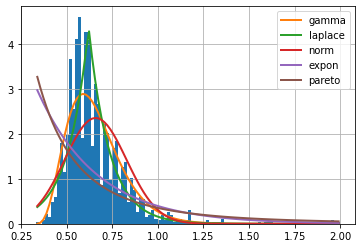

In [14]:
# Check likely distribution for sulphates 

f = Fitter(sulphates, distributions=['norm','laplace','pareto','gamma','expon']) 

f.fit() 
f.summary() 

In [15]:
# normality test for sulphates

stat, p = shapiro(sulphates)
alpha = 0.05
if p > alpha:
 print('Distribution of sulphates data looks normal')
else:
 print('Distribution of sulphates data does not look normal')

Distribution of sulphates data does not look normal


In [16]:
# split df into individual variables to examine distribution
alcohol = df.loc[:, 'alcohol']
alcohol

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 50.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3.804594,556.316725,-9637.306950,inf,0.084651,2.039272e-10
norm,4.333395,643.293887,-9436.586766,inf,0.121499,4.991377e-21
laplace,4.637458,565.622255,-9328.150451,inf,0.119467,2.415656e-20
expon,5.811981,466.222317,-8967.168149,inf,0.288478,2.585105e-118
pareto,6.273617,480.722802,-8837.576761,inf,0.312313,4.544259e-139


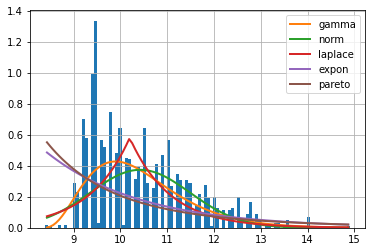

In [17]:
# Check likely distribution for alcohol 

f = Fitter(alcohol, distributions=['norm','laplace','pareto','gamma','expon']) 

f.fit() 
f.summary()

In [18]:
# normality test for alcohol
stat, p = shapiro(alcohol)
alpha = 0.05
if p > alpha:
 print('Distribution of alcohol data looks normal')
else:
 print('Distribution of alcohol data does not look normal')


Distribution of alcohol data does not look normal


### Synthesise random dataset based on real data

The variables to be synethesised did not show normal distribution and it was difficult to establish which distribution they exhibited. So a solution would be create sample data based on the distribution of the original variables using the Copulas library. **[6]**


<Axes3DSubplot:>

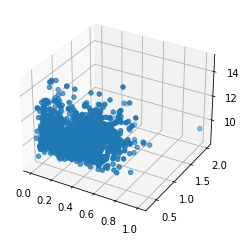

In [19]:
# Distibutions of variables
# https://sdv.dev/Copulas/tutorials/03_Multivariate_Distributions.html
import copulas as cp
from copulas.visualization import scatter_3d

scatter_3d(z)

In [20]:
from copulas.multivariate import GaussianMultivariate

dist = GaussianMultivariate()
dist.fit(z)

### Synthesized dataset 
It can be observed from the 3-d visualisation that the synthetic dataset has more outliers and is not as dense as the real data set. From the summary statistics, it's obvious the datasets are quite close. The minimum value for citric acid is a negative number which doesn't happen in reality. Citric acid measurement is greater than 0. **[7]**

In [21]:
synthesized = dist.sample(1000)
synthesized

,citric acid,sulphates,alcohol
0,0.369698,0.553440,11.012150
1,0.255513,0.793542,9.546135
2,0.562454,1.257721,10.853270
3,0.433766,1.266934,10.006956
4,0.482081,0.623824,10.723280
...,...,...,...
995,0.368880,0.678610,11.204914
996,0.278125,0.779915,9.519243
997,0.418891,0.535184,11.810054
998,0.221206,0.695319,9.441677


In [22]:
synthesized.head()

,citric acid,sulphates,alcohol
0,0.369698,0.553440,11.012150
1,0.255513,0.793542,9.546135
2,0.562454,1.257721,10.853270
3,0.433766,1.266934,10.006956
4,0.482081,0.623824,10.723280


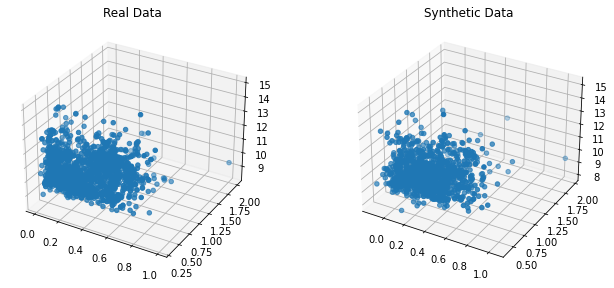

In [23]:
# visualise real and synthesized data sets
from copulas.visualization import compare_3d
compare_3d(z, synthesized)

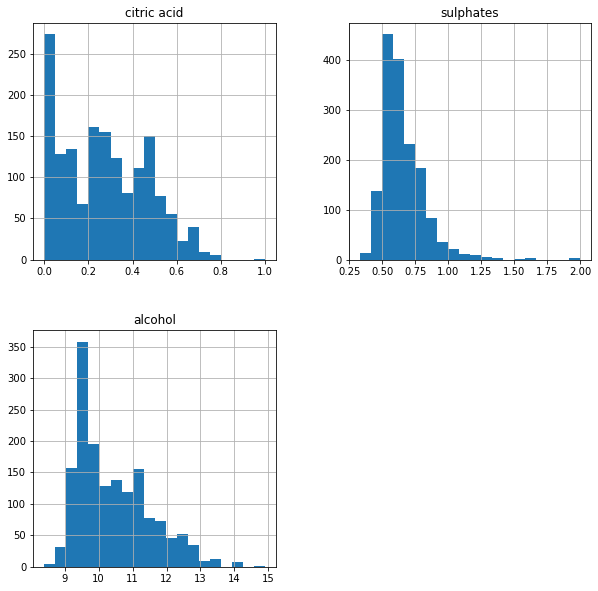

In [24]:
#plot real data
z.hist(bins=20, figsize=(10, 10))
plt.show()

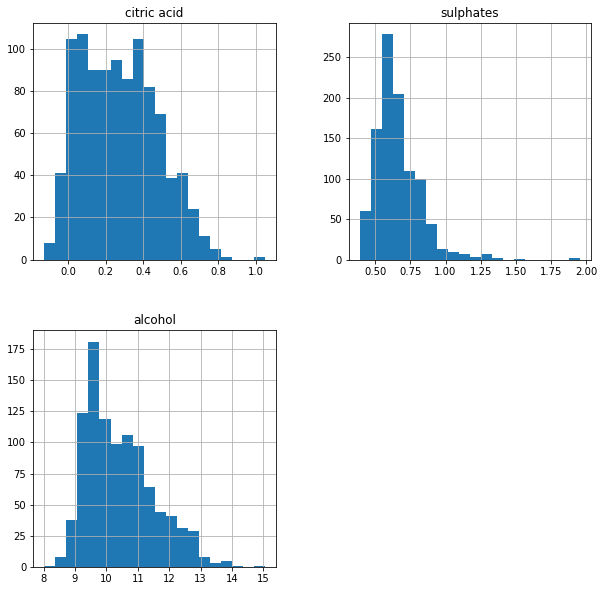

In [25]:
#plot synthetic data
synthesized.hist(bins=20, figsize=(10, 10))
plt.show()

In [26]:
# summary statistics for real dataset
z.describe().T

,count,mean,std,min,25%,50%,75%,max
citric acid,1599.0,0.270976,0.194801,0.00,0.09,0.26,0.42,1.0
sulphates,1599.0,0.658149,0.169507,0.33,0.55,0.62,0.73,2.0
alcohol,1599.0,10.422983,1.065668,8.40,9.50,10.20,11.10,14.9


In [27]:
# summary statistics for synthesized dataset
synthesized.describe().T

,count,mean,std,min,25%,50%,75%,max
citric acid,1000.0,0.273989,0.200213,-0.126003,0.102292,0.258264,0.418331,1.047655
sulphates,1000.0,0.659681,0.164395,0.389259,0.556400,0.625008,0.736911,1.959147
alcohol,1000.0,10.435570,1.083404,8.023813,9.581457,10.216172,11.106454,15.051811


In [28]:
synthesized.to_csv('synth_data.csv', sep = ',')

## Bibliography
1. Cortez P., Cerdeira A., Almeida F., Matos T., Reis J. (2009) Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47 (4), pp. 547-553. https://doi.org/10.1016/j.dss.2009.05.016 
2. https://www.science.org.au/curious/earth-environment/chemistry-wine-part-1 
3. Markoski MM, Garavaglia J, Oliveira A, Olivaes J, Marcadenti A. (2016) Molecular Properties of Red Wine Compounds and Cardiometabolic Benefits. Nutr Metab Insights. 2;9:51-7. https://doi.org/10.4137/NMI.S32909
4. Vilela, A. (2019) Use of Nonconventional Yeasts for Modulating Wine Acidity. Fermentation, 5, 27. https://doi.org/10.3390/fermentation5010027
5. Steakley, J., Steakley, B. (2020). Red Wine Volatile Acidity Problem Solving with Cause and Effect Analysis. In: A Quest for Quality Wine, Every Time.. Springer, Cham. https://doi.org/10.1007/978-3-030-34000-1_5 
6. Rick (2021) How can I generate samples from a non-normal multivariable distribution in Python? 
https://stackoverflow.com/questions/65877211/how-can-i-generate-samples-from-a-non-normal-multivariable-distribution-in-pytho
7. Vinho Verde Region Viticulture Commission (2022) Compliance rules for red wine, Vinho Verde. https://portal.vinhoverde.pt/pt/produtos-regras-de-conformidade/T